In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats 
import seaborn as sns

### Annotation

In [16]:
annot = pd.read_csv("/Users/csb/Desktop/De_Novo/edgeR_dir/annotation.txt", sep = " ") # gene IDs
FPKM = pd.read_csv("/Users/csb/Desktop/De_Novo/edgeR_dir/84.isoform.counts.matrix.TMM_normalized.FPKM", sep ="\t")
deg = pd.read_csv("/Users/csb/Desktop/De_Novo/edgeR_dir/ABC.isoform.counts.matrix.83.RSEM_vs_84.RSEM.edgeR.DE_results", sep = "\t")

In [3]:
FPKM = FPKM.rename(columns ={'Unnamed: 0':'gene_id'})
FPKM

,gene_id,83.RSEM,84.RSEM
0,TRINITY_DN102_c17_g1_i1,5.65,3.58
1,TRINITY_DN11642_c0_g1_i23,1.62,1.74
2,TRINITY_DN50525_c0_g1_i2,0.19,0.11
3,TRINITY_DN450_c4_g1_i1,0.72,0.00
4,TRINITY_DN38906_c0_g1_i1,0.35,0.21
...,...,...,...
40496,TRINITY_DN1765_c2_g1_i1,2.75,5.60
40497,TRINITY_DN1658_c1_g1_i1,1.14,2.19
40498,TRINITY_DN7194_c0_g1_i1,0.30,0.09
40499,TRINITY_DN3639_c3_g1_i1,1.05,0.25


In [4]:
annot

,TRINITY_DN0_c0_g1_i2,sp|P27088|XPA_XENLA
0,TRINITY_DN0_c0_g1_i3,sp|P27088|XPA_XENLA
1,TRINITY_DN0_c0_g1_i5,sp|P27089|XPA_CHICK
2,TRINITY_DN0_c0_g1_i6,sp|P27088|XPA_XENLA
3,TRINITY_DN0_c0_g1_i8,sp|P27089|XPA_CHICK
4,TRINITY_DN10005_c0_g1_i1,sp|B1WB06|MET24_XENTR
...,...,...
29121,TRINITY_DN9_c8_g1_i10,sp|Q6PFX9|TNKS1_MOUSE
29122,TRINITY_DN9_c8_g1_i13,sp|Q6PFX9|TNKS1_MOUSE
29123,TRINITY_DN9_c8_g1_i13,sp|Q6PFX9|TNKS1_MOUSE
29124,TRINITY_DN9_c8_g1_i13,sp|Q6PFX9|TNKS1_MOUSE


In [6]:
annot.loc[len(annot.index)] = ['gene_id', 'prot_id'] # add row 

annot.rename(columns=annot.iloc[-1], inplace = True) # replace the above added row as header
annot = annot.iloc[:-1] # delete that last row
annot

,gene_id,prot_id
0,TRINITY_DN0_c0_g1_i3,sp|P27088|XPA_XENLA
1,TRINITY_DN0_c0_g1_i5,sp|P27089|XPA_CHICK
2,TRINITY_DN0_c0_g1_i6,sp|P27088|XPA_XENLA
3,TRINITY_DN0_c0_g1_i8,sp|P27089|XPA_CHICK
4,TRINITY_DN10005_c0_g1_i1,sp|B1WB06|MET24_XENTR
...,...,...
29121,TRINITY_DN9_c8_g1_i10,sp|Q6PFX9|TNKS1_MOUSE
29122,TRINITY_DN9_c8_g1_i13,sp|Q6PFX9|TNKS1_MOUSE
29123,TRINITY_DN9_c8_g1_i13,sp|Q6PFX9|TNKS1_MOUSE
29124,TRINITY_DN9_c8_g1_i13,sp|Q6PFX9|TNKS1_MOUSE


In [7]:
name = annot['gene_id']
name # extracting only the gene ids

0            TRINITY_DN0_c0_g1_i3
1            TRINITY_DN0_c0_g1_i5
2            TRINITY_DN0_c0_g1_i6
3            TRINITY_DN0_c0_g1_i8
4        TRINITY_DN10005_c0_g1_i1
                   ...           
29121       TRINITY_DN9_c8_g1_i10
29122       TRINITY_DN9_c8_g1_i13
29123       TRINITY_DN9_c8_g1_i13
29124       TRINITY_DN9_c8_g1_i13
29125       TRINITY_DN9_c8_g1_i13
Name: gene_id, Length: 29126, dtype: object

In [8]:
df_int=FPKM.merge(annot, on=['gene_id'], how='inner') # find genes that are in both annot and FPKM
df_int

,gene_id,83.RSEM,84.RSEM,prot_id
0,TRINITY_DN26554_c0_g1_i9,0.40,0.58,sp|Q09575|YRD6_CAEEL
1,TRINITY_DN1093_c0_g1_i18,2.66,2.27,sp|O35075|VP26C_MOUSE
2,TRINITY_DN2475_c0_g1_i12,8.00,10.25,sp|A1A5G0|CLAP1_XENTR
3,TRINITY_DN650_c0_g1_i1,12.43,4.20,sp|P47211|GALR1_HUMAN
4,TRINITY_DN1423_c2_g1_i1,1.77,1.88,sp|Q6KCD5|NIPBL_MOUSE
...,...,...,...,...
28705,TRINITY_DN15047_c0_g1_i1,27.15,31.91,sp|Q3ZCX4|ZN568_HUMAN
28706,TRINITY_DN5192_c6_g1_i3,0.38,0.51,sp|Q967D7|TUTL_DROME
28707,TRINITY_DN5192_c6_g1_i3,0.38,0.51,sp|Q967D7|TUTL_DROME
28708,TRINITY_DN2249_c0_g1_i6,16.94,16.28,sp|P35249|RFC4_HUMAN


In [9]:
#selecting only the columns of interest
columns = ["gene_id",'prot_id',"83.RSEM",'84.RSEM']
annotation = df_int.reindex(columns=columns)
annotation #annotation table with FPKM

,gene_id,prot_id,83.RSEM,84.RSEM
0,TRINITY_DN26554_c0_g1_i9,sp|Q09575|YRD6_CAEEL,0.40,0.58
1,TRINITY_DN1093_c0_g1_i18,sp|O35075|VP26C_MOUSE,2.66,2.27
2,TRINITY_DN2475_c0_g1_i12,sp|A1A5G0|CLAP1_XENTR,8.00,10.25
3,TRINITY_DN650_c0_g1_i1,sp|P47211|GALR1_HUMAN,12.43,4.20
4,TRINITY_DN1423_c2_g1_i1,sp|Q6KCD5|NIPBL_MOUSE,1.77,1.88
...,...,...,...,...
28705,TRINITY_DN15047_c0_g1_i1,sp|Q3ZCX4|ZN568_HUMAN,27.15,31.91
28706,TRINITY_DN5192_c6_g1_i3,sp|Q967D7|TUTL_DROME,0.38,0.51
28707,TRINITY_DN5192_c6_g1_i3,sp|Q967D7|TUTL_DROME,0.38,0.51
28708,TRINITY_DN2249_c0_g1_i6,sp|P35249|RFC4_HUMAN,16.94,16.28


In [17]:
deg

,sampleA,sampleB,logFC,logCPM,PValue,FDR
TRINITY_DN547_c0_g1_i4,83.RSEM,84.RSEM,8.169934,5.361709,8.399254e-18,1.180935e-13
TRINITY_DN5763_c0_g1_i1,83.RSEM,84.RSEM,9.785582,4.129817,1.028115e-17,1.180935e-13
TRINITY_DN6470_c0_g1_i3,83.RSEM,84.RSEM,-12.506545,3.747247,1.334389e-17,1.180935e-13
TRINITY_DN547_c0_g1_i10,83.RSEM,84.RSEM,8.244455,4.772409,3.340918e-17,2.185939e-13
TRINITY_DN152_c0_g1_i4,83.RSEM,84.RSEM,12.342390,3.576483,4.116646e-17,2.185939e-13
...,...,...,...,...,...,...
TRINITY_DN2805_c2_g1_i11,83.RSEM,84.RSEM,0.000109,4.709268,1.000000e+00,1.000000e+00
TRINITY_DN3050_c0_g1_i1,83.RSEM,84.RSEM,0.000063,5.867018,1.000000e+00,1.000000e+00
TRINITY_DN53_c12_g1_i1,83.RSEM,84.RSEM,0.000042,3.484515,1.000000e+00,1.000000e+00
TRINITY_DN2342_c2_g1_i1,83.RSEM,84.RSEM,-0.000031,3.271144,1.000000e+00,1.000000e+00


In [18]:
deg = deg[['logFC','PValue', 'FDR']].reset_index().rename(columns={'index':'gene_id'})
deg

,gene_id,logFC,PValue,FDR
0,TRINITY_DN547_c0_g1_i4,8.169934,8.399254e-18,1.180935e-13
1,TRINITY_DN5763_c0_g1_i1,9.785582,1.028115e-17,1.180935e-13
2,TRINITY_DN6470_c0_g1_i3,-12.506545,1.334389e-17,1.180935e-13
3,TRINITY_DN547_c0_g1_i10,8.244455,3.340918e-17,2.185939e-13
4,TRINITY_DN152_c0_g1_i4,12.342390,4.116646e-17,2.185939e-13
...,...,...,...,...
26545,TRINITY_DN2805_c2_g1_i11,0.000109,1.000000e+00,1.000000e+00
26546,TRINITY_DN3050_c0_g1_i1,0.000063,1.000000e+00,1.000000e+00
26547,TRINITY_DN53_c12_g1_i1,0.000042,1.000000e+00,1.000000e+00
26548,TRINITY_DN2342_c2_g1_i1,-0.000031,1.000000e+00,1.000000e+00


In [19]:
int_df = df_int.merge(deg, on=['gene_id'], how='inner')
int_df

,gene_id,83.RSEM,84.RSEM,prot_id,logFC,PValue,FDR
0,TRINITY_DN1093_c0_g1_i18,2.66,2.27,sp|O35075|VP26C_MOUSE,0.250902,0.725002,1.000000
1,TRINITY_DN2475_c0_g1_i12,8.00,10.25,sp|A1A5G0|CLAP1_XENTR,-0.335717,0.610027,1.000000
2,TRINITY_DN650_c0_g1_i1,12.43,4.20,sp|P47211|GALR1_HUMAN,1.583322,0.020704,0.328199
3,TRINITY_DN1423_c2_g1_i1,1.77,1.88,sp|Q6KCD5|NIPBL_MOUSE,-0.061526,0.938369,1.000000
4,TRINITY_DN1046_c0_g1_i4,0.65,0.62,sp|Q8R1Z9|RN121_MOUSE,0.083355,0.908721,1.000000
...,...,...,...,...,...,...,...
23541,TRINITY_DN15047_c0_g1_i1,27.15,31.91,sp|Q3ZCX4|ZN568_HUMAN,-0.212352,0.746957,1.000000
23542,TRINITY_DN5192_c6_g1_i3,0.38,0.51,sp|Q967D7|TUTL_DROME,-0.464183,0.575777,1.000000
23543,TRINITY_DN5192_c6_g1_i3,0.38,0.51,sp|Q967D7|TUTL_DROME,-0.464183,0.575777,1.000000
23544,TRINITY_DN2249_c0_g1_i6,16.94,16.28,sp|P35249|RFC4_HUMAN,0.078897,0.908577,1.000000


In [20]:
columns = ["gene_id",'prot_id',"83.RSEM",'84.RSEM','logFC','PValue','FDR']
df_annot = int_df.reindex(columns=columns)
df_annot

,gene_id,prot_id,83.RSEM,84.RSEM,logFC,PValue,FDR
0,TRINITY_DN1093_c0_g1_i18,sp|O35075|VP26C_MOUSE,2.66,2.27,0.250902,0.725002,1.000000
1,TRINITY_DN2475_c0_g1_i12,sp|A1A5G0|CLAP1_XENTR,8.00,10.25,-0.335717,0.610027,1.000000
2,TRINITY_DN650_c0_g1_i1,sp|P47211|GALR1_HUMAN,12.43,4.20,1.583322,0.020704,0.328199
3,TRINITY_DN1423_c2_g1_i1,sp|Q6KCD5|NIPBL_MOUSE,1.77,1.88,-0.061526,0.938369,1.000000
4,TRINITY_DN1046_c0_g1_i4,sp|Q8R1Z9|RN121_MOUSE,0.65,0.62,0.083355,0.908721,1.000000
...,...,...,...,...,...,...,...
23541,TRINITY_DN15047_c0_g1_i1,sp|Q3ZCX4|ZN568_HUMAN,27.15,31.91,-0.212352,0.746957,1.000000
23542,TRINITY_DN5192_c6_g1_i3,sp|Q967D7|TUTL_DROME,0.38,0.51,-0.464183,0.575777,1.000000
23543,TRINITY_DN5192_c6_g1_i3,sp|Q967D7|TUTL_DROME,0.38,0.51,-0.464183,0.575777,1.000000
23544,TRINITY_DN2249_c0_g1_i6,sp|P35249|RFC4_HUMAN,16.94,16.28,0.078897,0.908577,1.000000


In [ ]:
df_annot.to_csv('/Users/csb/Desktop/De_Novo/edgeR_dir/Annotation.TMM_FPKM.txt', sep='', index = False) # save the file

### Plot: logFC vs. PValue

In [43]:
# Defining threshold value
logFC_thresh = 1.0
pvalue_thresh = 0.05

In [44]:
# Add columns to data frame indicating significant points
df_annot['Significant'] = ((df_annot['logFC'].abs() >= logFC_thresh) & (df_annot['PValue'] < pvalue_thresh))
df_annot['Color'] = df_annot['Significant'].apply(lambda x: 'r' if x else 'k')

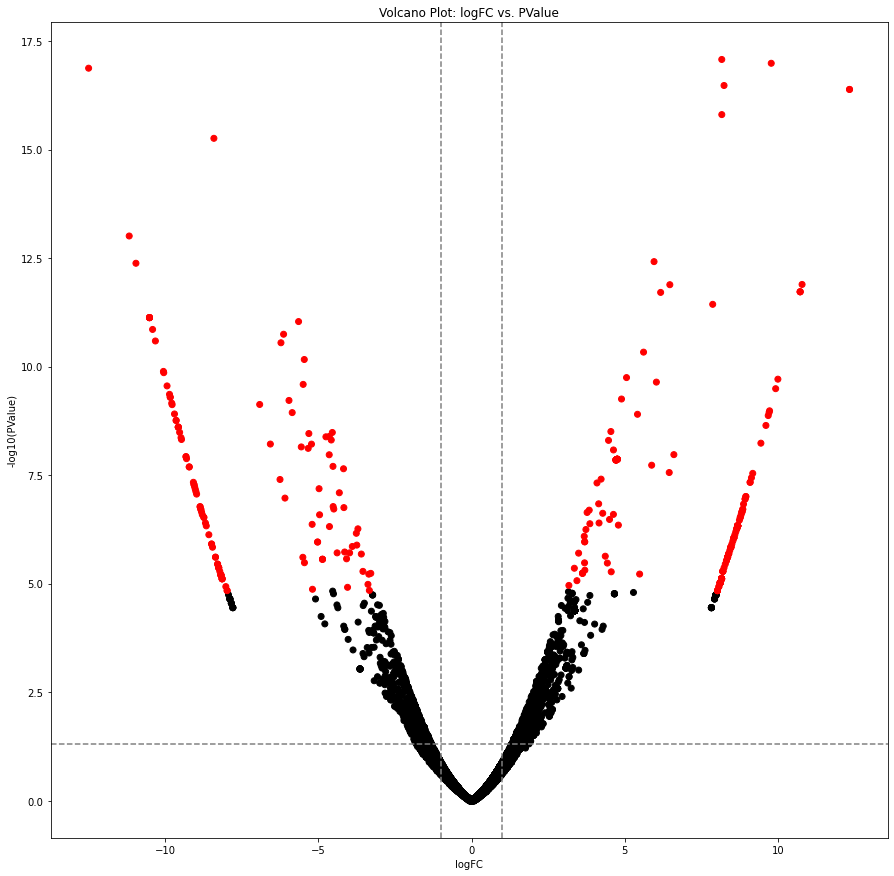

In [55]:
# Create volcano plot
plt.figure(figsize=(15,15))
plt.scatter(df_annot['logFC'], -1 * np.log10(df_annot['PValue']), color=df_annot['Color'])
plt.axhline(-1 * np.log10(pvalue_thresh), linestyle='--', color='grey')
plt.axvline(-1 * logFC_thresh, linestyle='--', color='grey')
plt.axvline(logFC_thresh, linestyle='--', color='grey')
plt.xlabel('logFC')
plt.ylabel('-log10(PValue)')
plt.title('Volcano Plot: logFC vs. PValue')

plt.show()

## Plot: logFC vs. logFDR

In [46]:
# Defining threshold value
logFC_thresh = 1.0
FDR_thresh = 0.001

In [47]:
# Add columns to data frame indicating significant points
df_annot['Sig_FDR'] = ((df_annot['logFC'].abs() >= logFC_thresh) & (df_annot['FDR'] < FDR_thresh))
df_annot['Color'] = df_annot['Sig_FDR'].apply(lambda x: 'r' if x else 'k')

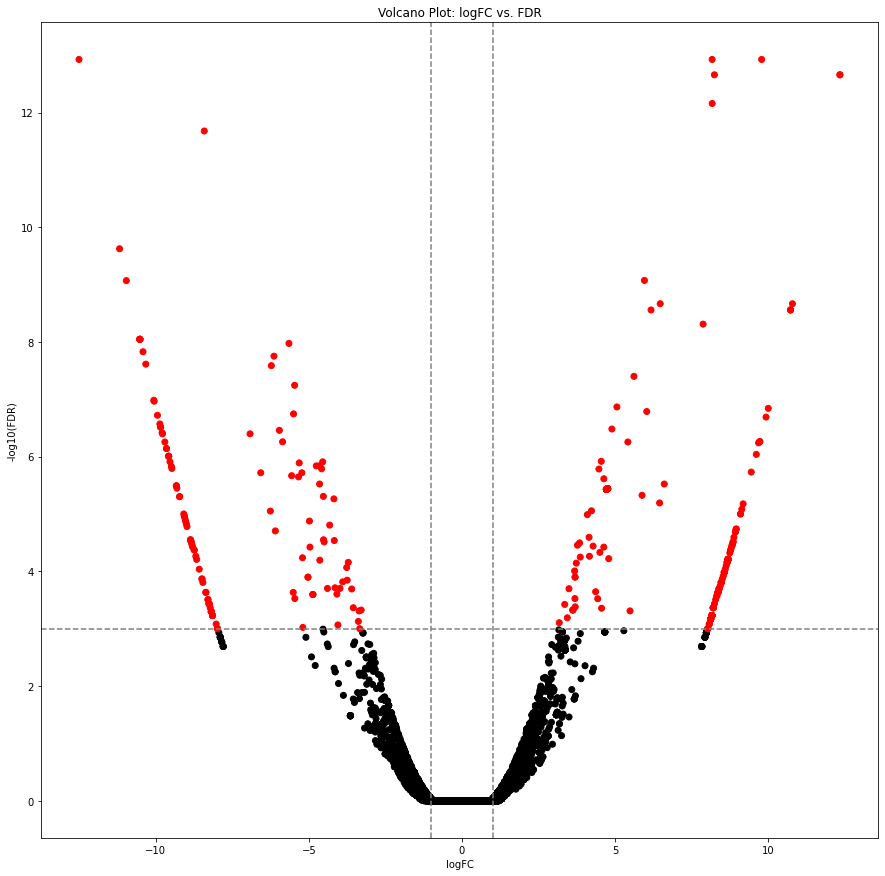

In [54]:
# Create volcano plot
plt.figure(figsize=(15,15))
plt.scatter(df_annot['logFC'], -1 * np.log10(df_annot['FDR']), color=df_annot['Color'])
plt.axhline(-1 * np.log10(FDR_thresh), linestyle='--', color='grey')
plt.axvline(-1 * logFC_thresh, linestyle='--', color='grey')
plt.axvline(logFC_thresh, linestyle='--', color='grey')
plt.xlabel('logFC')
plt.ylabel('-log10(FDR)')
plt.title('Volcano Plot: logFC vs. FDR')

# Add labels for significant points
#for i, row in df_annot[df_annot['Sig_FDR']].iterrows():
    #plt.text(row['logFC'], -1 * np.log10(row['FDR']), row['gene_id'])


plt.show()

In [53]:
df_annot

,gene_id,prot_id,83.RSEM,84.RSEM,logFC,PValue,FDR,Significant,Color,Sig_FDR
0,TRINITY_DN1093_c0_g1_i18,sp|O35075|VP26C_MOUSE,2.66,2.27,0.250902,0.725002,1.000000,False,k,False
1,TRINITY_DN2475_c0_g1_i12,sp|A1A5G0|CLAP1_XENTR,8.00,10.25,-0.335717,0.610027,1.000000,False,k,False
2,TRINITY_DN650_c0_g1_i1,sp|P47211|GALR1_HUMAN,12.43,4.20,1.583322,0.020704,0.328199,True,k,False
3,TRINITY_DN1423_c2_g1_i1,sp|Q6KCD5|NIPBL_MOUSE,1.77,1.88,-0.061526,0.938369,1.000000,False,k,False
4,TRINITY_DN1046_c0_g1_i4,sp|Q8R1Z9|RN121_MOUSE,0.65,0.62,0.083355,0.908721,1.000000,False,k,False
...,...,...,...,...,...,...,...,...,...,...
23541,TRINITY_DN15047_c0_g1_i1,sp|Q3ZCX4|ZN568_HUMAN,27.15,31.91,-0.212352,0.746957,1.000000,False,k,False
23542,TRINITY_DN5192_c6_g1_i3,sp|Q967D7|TUTL_DROME,0.38,0.51,-0.464183,0.575777,1.000000,False,k,False
23543,TRINITY_DN5192_c6_g1_i3,sp|Q967D7|TUTL_DROME,0.38,0.51,-0.464183,0.575777,1.000000,False,k,False
23544,TRINITY_DN2249_c0_g1_i6,sp|P35249|RFC4_HUMAN,16.94,16.28,0.078897,0.908577,1.000000,False,k,False
